#프로젝트 소개
YOLOv8이 객체 검출뿐만 아니라 인물 검출의 가능성을 확인하기 위해 인물 사진에 레이블링을 수행하였으며, 이를 통해 인물이 잘 검출되는지를 검증하고자 진행한 코드입니다.

YOLO 형식으로 레이블링한 데이터를 손쉽게 저장할 수 있는 Labelling 도구를 사용하여 YOLOv8 모델의 학습 데이터를 레이블링하여 훈련한 코드입니다.

<주요 기능>

● 데이터 레이블링 : YOLO 형식으로 레이블링한 데이터를 손쉽게 저장할 수 있는 Labelling 도구를 사용하여 YOLOv8 모델의 학습 데이터를 레이블링

● YAML 파일 생성 : YOLO와 같은 객체 검출 모델의 훈련 및 검증 데이터셋을 설정하기 위해 YAML 형식으로 데이터셋 구성을 정의

● 모델 학습 파리미터 설정 : Epochs, patience, batch_size, optimizer 등의 파라미터 설정을 하여 모델 성능을 최적화하는데 중점

● 훈련 완료 후 모델 예측 및 결과 저장 : 학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행하고, 예측된 이미지를 저장

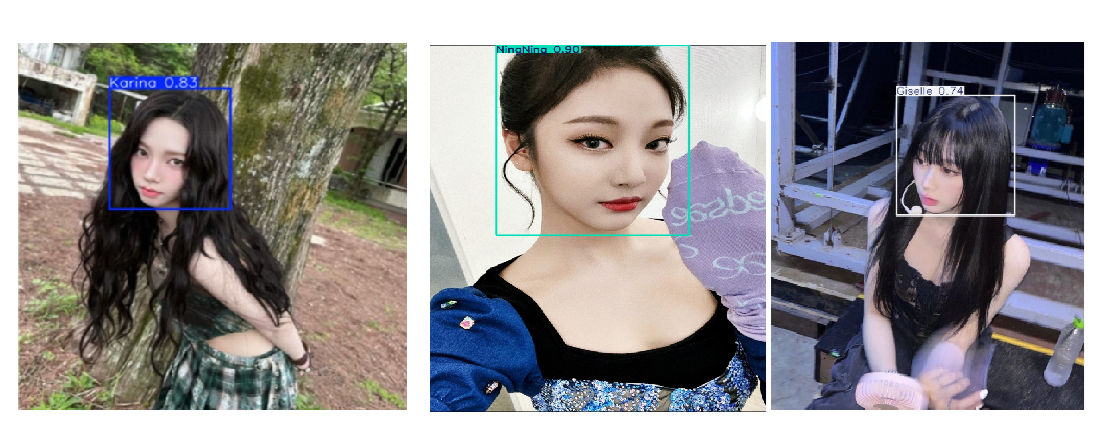

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


YOLO 데이터셋 구성을 위한 YAML 파일 생성 및 로드

In [ ]:
import yaml
data = {'train' : '/content/drive/MyDrive/aespa_project/train/images/',
        'val' : '/content/drive/MyDrive/aespa_project/valid/images/',
        'test' : '/content/drive/MyDrive/aespa_project/test/images/',
        'names' : ['Karina' , 'Winter' , 'Giselle' , 'NingNing'],
        'nc' : 4}
with open('/content/drive/MyDrive/aespa_project/Aespa_Data.yaml' , 'w') as f:
  yaml.dump(data , f)
with open('/content/drive/MyDrive/aespa_project/Aespa_Data.yaml' , 'r') as f:
  asepa_yaml = yaml.safe_load(f)
  display(asepa_yaml)

{'names': ['Karina', 'Winter', 'Giselle', 'NingNing'],
 'nc': 4,
 'test': '/content/drive/MyDrive/aespa_project/test/images/',
 'train': '/content/drive/MyDrive/aespa_project/train/images/',
 'val': '/content/drive/MyDrive/aespa_project/valid/images/'}

YOLO를 사용하기 위한 Ultralytics 라이브러리 다운로드

In [ ]:
!pip install ultralytics

In [ ]:
import os
os.environ['WANDB_MODE'] = 'disabled'
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

훈련 파라미터 설정(Epoch : 100번 , Patience : 30번 , Batch_size = 32 , 학습률 : 0.001 , 옵티마이저 : 'Adam' , 모멘텀 : 0.9 , 데이터 증강 : True)

Epoch 90번 훈련 결과 Precision 0.937 , Recall 0.922 , mAP@50 0.949 , mAP@50-95 0.695



In [ ]:
train_params = {
    'data' : '/content/drive/MyDrive/aespa_project/Aespa_Data.yaml',
    'epochs' : 100,
    'patience' : 30,
    'batch' : 32,
    'imgsz' : 416,
    'lr0' : 0.001,
    'optimizer' : 'Adam',
    'momentum' : 0.9,
    'augment' : True,
    'pretrained' : True,
    'device' : 'cuda'
}
model.train(**train_params)

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/aespa_project/Aespa_Data.yaml, epochs=100, time=None, patience=30, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/aespa_project/train/labels.cache... 1713 images, 66 backgrounds, 0 corrupt: 100%|██████████| 1779/1779 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/aespa_project/valid/labels.cache... 282 images, 0 backgrounds, 0 corrupt: 100%|██████████| 282/282 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.44G      1.182      2.301      1.243         45        416: 100%|██████████| 56/56 [06:10<00:00,  6.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        282        286     0.0238          1      0.325      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.42G       1.18      1.594      1.221         44        416: 100%|██████████| 56/56 [00:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        282        286      0.465      0.369       0.36      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.42G      1.172       1.48      1.221         40        416: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


                   all        282        286      0.267      0.323      0.214     0.0934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.42G      1.148      1.424      1.222         38        416: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        282        286      0.335      0.607      0.485       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.42G      1.167      1.337      1.231         38        416: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.67it/s]

                   all        282        286      0.512      0.707      0.625      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.42G      1.145      1.302      1.218         45        416: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        282        286      0.535      0.715      0.638      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.42G       1.12      1.234      1.199         40        416: 100%|██████████| 56/56 [00:26<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        282        286      0.625      0.609      0.649      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.42G      1.111      1.211      1.193         35        416: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        282        286      0.638      0.709      0.694      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.42G      1.102      1.147      1.205         36        416: 100%|██████████| 56/56 [00:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        282        286      0.627      0.663      0.628      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.42G      1.098      1.148      1.192         38        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        282        286      0.466      0.745      0.687      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.42G      1.075      1.112      1.184         44        416: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        282        286      0.687      0.734      0.742      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.42G      1.059      1.078      1.174         47        416: 100%|██████████| 56/56 [00:25<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        282        286      0.759      0.741      0.813      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.42G      1.065      1.068      1.182         40        416: 100%|██████████| 56/56 [00:27<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        282        286      0.595      0.593      0.639       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.42G      1.043      1.033      1.163         40        416: 100%|██████████| 56/56 [00:29<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        282        286      0.632       0.67      0.699       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.42G       1.05      1.002      1.173         48        416: 100%|██████████| 56/56 [00:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        282        286      0.663      0.795      0.773      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.42G      1.044     0.9916      1.174         48        416: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


                   all        282        286      0.784       0.85      0.871      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.42G      1.038      1.002      1.169         40        416: 100%|██████████| 56/56 [00:26<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        282        286      0.798      0.816      0.854      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.42G       1.04     0.9461      1.173         38        416: 100%|██████████| 56/56 [00:27<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]

                   all        282        286      0.668      0.773      0.753      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.42G      1.014     0.9439      1.152         42        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]

                   all        282        286      0.768      0.735      0.799      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.42G       1.02     0.9426       1.16         51        416: 100%|██████████| 56/56 [00:30<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        282        286      0.745      0.792      0.814      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.42G      1.002     0.9152      1.147         47        416: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.89it/s]

                   all        282        286      0.812      0.848      0.894      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.42G      1.017     0.9096       1.16         39        416: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        282        286      0.775      0.801       0.85      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.42G     0.9963     0.8925      1.155         43        416: 100%|██████████| 56/56 [00:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.13s/it]

                   all        282        286      0.798      0.873       0.91      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.42G      1.021     0.8968      1.162         44        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        282        286       0.81      0.793      0.857      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.42G      1.002     0.8766      1.156         44        416: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        282        286      0.755      0.835      0.858       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.42G     0.9589     0.8577      1.132         46        416: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        282        286      0.879      0.806      0.902      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.42G     0.9632     0.8568      1.137         47        416: 100%|██████████| 56/56 [00:30<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        282        286      0.806       0.81      0.875      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.42G     0.9778     0.8494      1.131         40        416: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        282        286      0.828      0.857      0.911      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.42G     0.9651     0.8287       1.13         43        416: 100%|██████████| 56/56 [00:27<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        282        286      0.832      0.827      0.901      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.42G     0.9784     0.8343      1.147         36        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        282        286      0.889      0.865      0.919      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.42G     0.9591      0.796      1.131         34        416: 100%|██████████| 56/56 [00:27<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        282        286      0.843      0.833      0.902      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.42G     0.9401     0.7972      1.119         34        416: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


                   all        282        286      0.871       0.83      0.895      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.42G     0.9633     0.8017      1.127         40        416: 100%|██████████| 56/56 [00:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        282        286      0.906      0.872      0.931       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.42G     0.9523     0.8113      1.135         45        416: 100%|██████████| 56/56 [00:33<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        282        286      0.825      0.871      0.919      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.42G     0.9355     0.7904      1.126         33        416: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]

                   all        282        286      0.882      0.884      0.932      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.42G     0.9587     0.7781       1.13         42        416: 100%|██████████| 56/56 [00:27<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        282        286      0.868       0.87      0.936      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.42G     0.9275     0.7546      1.116         43        416: 100%|██████████| 56/56 [00:26<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        282        286      0.813       0.85      0.887      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.42G     0.9488      0.765      1.129         41        416: 100%|██████████| 56/56 [00:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        282        286      0.849      0.894      0.883      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.42G     0.9511     0.7717      1.129         45        416: 100%|██████████| 56/56 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        282        286      0.899      0.865      0.919      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.42G     0.9242     0.7591      1.114         34        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        282        286      0.855      0.845      0.905      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.42G     0.9335     0.7503      1.118         48        416: 100%|██████████| 56/56 [00:29<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.47it/s]

                   all        282        286      0.879      0.877      0.944      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.42G     0.9111     0.7259      1.113         49        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


                   all        282        286      0.852      0.896      0.931       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.42G     0.9201     0.7242      1.115         38        416: 100%|██████████| 56/56 [00:27<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]

                   all        282        286      0.883      0.915       0.93      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.42G     0.9205     0.7223      1.119         34        416: 100%|██████████| 56/56 [00:26<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.65it/s]

                   all        282        286      0.851      0.878      0.917      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.42G     0.8971      0.696      1.103         38        416: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        282        286        0.9      0.901      0.947      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.42G     0.8988     0.7103      1.104         40        416: 100%|██████████| 56/56 [00:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        282        286      0.884      0.886      0.946      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.42G      0.906     0.7287      1.104         43        416: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        282        286      0.893      0.916      0.955      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.42G     0.9109     0.7047       1.11         44        416: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        282        286      0.868      0.791      0.875      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.42G     0.8966     0.6898        1.1         39        416: 100%|██████████| 56/56 [00:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        282        286      0.901      0.888      0.938      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.42G     0.8801     0.7317      1.094         40        416: 100%|██████████| 56/56 [00:26<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        282        286      0.895      0.845      0.922      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.42G     0.8656     0.6968      1.087         51        416: 100%|██████████| 56/56 [00:27<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        282        286      0.911      0.903      0.953      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.42G     0.8848     0.6943      1.097         46        416: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]

                   all        282        286      0.887      0.895      0.936      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.42G     0.8739       0.68      1.089         44        416: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.81it/s]

                   all        282        286      0.867       0.93      0.949      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.42G     0.8893     0.6884      1.091         44        416: 100%|██████████| 56/56 [00:28<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        282        286      0.914      0.913       0.94      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.42G     0.8627     0.6726      1.083         35        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        282        286      0.908      0.868       0.92       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.42G     0.8673     0.6648       1.08         41        416: 100%|██████████| 56/56 [00:26<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        282        286      0.903      0.913      0.932      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.42G     0.8465     0.6651      1.074         44        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        282        286      0.887      0.919      0.936      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.42G     0.8518       0.64      1.086         35        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        282        286      0.871      0.904      0.924      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.42G     0.8496     0.6639      1.075         47        416: 100%|██████████| 56/56 [00:27<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        282        286      0.902      0.888      0.934      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.42G      0.847     0.6467      1.079         31        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        282        286      0.932      0.918      0.953      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.42G     0.8285     0.6407      1.081         36        416: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.87it/s]

                   all        282        286      0.931      0.895      0.937      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.42G     0.8323     0.6505      1.072         40        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        282        286      0.928      0.869      0.951      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.42G     0.8351      0.639      1.077         44        416: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.34it/s]

                   all        282        286      0.904      0.887      0.917      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.42G     0.8348     0.6588      1.089         39        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        282        286      0.906      0.914      0.956      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.42G      0.812     0.6284      1.072         34        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

                   all        282        286      0.919      0.932      0.934      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.42G      0.819      0.622       1.08         43        416: 100%|██████████| 56/56 [00:26<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.58it/s]

                   all        282        286      0.909      0.933      0.946      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.42G     0.8022     0.6169       1.07         34        416: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]

                   all        282        286      0.913      0.905      0.942      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.42G     0.7958     0.6176       1.06         43        416: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]

                   all        282        286      0.908       0.93      0.942      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.42G     0.7965     0.6011      1.059         46        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        282        286      0.954      0.908      0.958      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.42G     0.7714      0.586      1.049         41        416: 100%|██████████| 56/56 [00:27<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        282        286      0.946      0.921      0.955      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.42G     0.7782     0.5972      1.054         44        416: 100%|██████████| 56/56 [00:26<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]

                   all        282        286      0.943      0.923      0.952      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.42G     0.7902      0.595      1.056         39        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        282        286      0.929      0.942      0.948      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.42G      0.783     0.5917      1.056         39        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        282        286      0.916      0.932      0.949      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.42G     0.7694     0.6057      1.056         32        416: 100%|██████████| 56/56 [00:27<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        282        286      0.924      0.902      0.951      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.42G     0.7649     0.6005      1.046         32        416: 100%|██████████| 56/56 [00:26<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.32it/s]

                   all        282        286      0.954      0.935      0.964      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.42G     0.7436     0.5794      1.037         34        416: 100%|██████████| 56/56 [00:27<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        282        286      0.939      0.924      0.946      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.42G     0.7606     0.5741       1.05         38        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.11it/s]

                   all        282        286      0.941      0.948      0.969       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.42G     0.7538     0.5746      1.047         47        416: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        282        286      0.966      0.888      0.966      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.42G     0.7625     0.5885      1.052         43        416: 100%|██████████| 56/56 [00:27<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        282        286      0.924      0.932      0.952      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.42G     0.7402     0.5646      1.042         40        416: 100%|██████████| 56/56 [00:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.12s/it]

                   all        282        286      0.946      0.885      0.951      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.42G     0.7493      0.548       1.04         42        416: 100%|██████████| 56/56 [00:26<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

                   all        282        286      0.939      0.887      0.955      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.42G     0.7287     0.5469      1.032         46        416: 100%|██████████| 56/56 [00:26<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        282        286      0.918      0.896      0.947      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.42G     0.7239     0.5509      1.029         38        416: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        282        286      0.932      0.932      0.961      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.42G     0.7259     0.5504      1.034         45        416: 100%|██████████| 56/56 [00:30<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        282        286      0.924      0.939       0.96      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.42G     0.7109     0.5346      1.027         45        416: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        282        286      0.942      0.924      0.965      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.42G     0.7205     0.5344      1.029         40        416: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        282        286      0.931      0.915       0.96      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.42G     0.7117     0.5248      1.022         39        416: 100%|██████████| 56/56 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        282        286      0.918      0.937       0.96       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.42G     0.7056     0.5202      1.023         41        416: 100%|██████████| 56/56 [00:27<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.53it/s]

                   all        282        286      0.929      0.939       0.96      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.42G     0.6901      0.514      1.018         44        416: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        282        286      0.961      0.924      0.964       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.42G     0.6768     0.5241      1.011         43        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        282        286      0.937      0.922      0.949      0.695
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 60, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



90 epochs completed in 0.939 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 19.9MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 19.9MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 9,829,212 parameters, 0 gradients, 23.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


                   all        282        286      0.899      0.937      0.956      0.711
                Karina         73         73      0.938      0.863      0.926      0.692
                Winter         70         70       0.82      0.986      0.953      0.717
               Giselle         61         61      0.917      0.934      0.962      0.729
              NingNing         82         82      0.918      0.963      0.983      0.707
Speed: 0.1ms preprocess, 11.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78ce3ba31cc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
type(model.names) , len(model.names) , model.names

(dict, 4, {0: 'Karina', 1: 'Winter', 2: 'Giselle', 3: 'NingNing'})

test 폴더에 있는 이미지들을 훈련한 모델로 예측

In [ ]:
results = model.predict(source = '/content/drive/MyDrive/aespa_project/test/images/' , save = True)


image 1/100 /content/drive/MyDrive/aespa_project/test/images/123123sdff.jpg: 320x416 1 Karina, 40.1ms
image 2/100 /content/drive/MyDrive/aespa_project/test/images/12321sdq.jpg: 416x352 1 Karina, 78.1ms
image 3/100 /content/drive/MyDrive/aespa_project/test/images/123sdaqw.jpg: 416x352 1 Karina, 1 Winter, 1 NingNing, 33.3ms
image 4/100 /content/drive/MyDrive/aespa_project/test/images/1627482170982.jpg: 416x352 1 NingNing, 33.1ms
image 5/100 /content/drive/MyDrive/aespa_project/test/images/4foolsdayacc_(2).jpg: 416x288 1 Winter, 43.3ms
image 6/100 /content/drive/MyDrive/aespa_project/test/images/FosZ6ZxacAAzVU0.jpg: 416x320 1 Winter, 39.7ms
image 7/100 /content/drive/MyDrive/aespa_project/test/images/GOapRUQbsAEBiA2.jpg: 352x416 1 Winter, 45.6ms
image 8/100 /content/drive/MyDrive/aespa_project/test/images/IMG_1130.jpg: 416x352 1 Winter, 28.6ms
image 9/100 /content/drive/MyDrive/aespa_project/test/images/IMG_1143.jpg: 416x320 1 Winter, 26.7ms
image 10/100 /content/drive/MyDrive/aespa_proj

In [ ]:
model_path = '/content/runs/detect/train4/weights/best.pt'
models = YOLO(model_path)
model.info()

Model summary (fused): 268 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


(268, 43609692, 0, 164.8298496)